<a href="https://colab.research.google.com/github/pirategiri/DataScience/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive')
import os

Mounted at /gdrive


In [5]:
data_path = "/gdrive/My Drive/DagDataScienceMaterial/data_folder/optimization"
data_file = os.path.join(data_path, "heart_failure_clinical_records_dataset.csv")
df = pd.read_csv(data_file)

In [6]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
#y is DEATH EVENT  (DEATH EVENT) which we will have to predict in the feature
y=df['DEATH_EVENT']
#Drop data id and target value (y) from the dataFrame 
# remaining variables in the table are called features  

X = df.drop(["DEATH_EVENT"], axis=1).values
X = (X -X.mean())/X.std() 
#X = np.c_[np.ones(X.shape[0]), X] # x0 =1 



In [15]:
import numpy as np

def sigmoid(z):
  sig = 1.0/(1+np.exp(-z))
  return sig

# Linear  regression model 
class LogisticRegression:
    def __init__(self, alpha =0.01):

        self.alpha = alpha # learning rate 
        self.hist_loss =[] # empty list for loss histroy 
        self.hist_param = []  # empty list for parameter updates


    def fit_gd(self,x, y, iterations):

      """
      This fit function works for a gradident decent
      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size
      for it in range(iterations):
        z = np.dot(x, self.theta) 
        h = sigmoid(z) #1.0/(1+np.exp(-z))
        error = h - y
        loss = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) 
        self.hist_loss.append(loss)
        self.theta = self.theta - (self.alpha * (1/m) * np.dot(x.T, error))
        if it%100 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

    def fit_sgd(self,x, y, iterations):
      """
      This fit function works for a  Stocashtic gradident Decent, where we uptimized the parameters using 
      single observation 

      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size
      for it in range(iterations):
        loss = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)  # updating  with one sample at a time
            x_i = x[rand_ind,:] 
            y_i = y[rand_ind]
            z = np.dot(x_i, self.theta)
            h = sigmoid(z) #1.0/(1+np.exp(-z))
            error = h - y_i
            loss += - np.sum(y_i * np.log(h) + (1 - y_i) * np.log(1 - h))
            self.theta = self.theta - (self.alpha*np.dot(x_i.T, error))

        self.hist_loss.append(loss)
        if it%200 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

    def fit_batch_sgd(self, x, y, iterations, batch_size = 5):
        """
        This fit function works for a  Stocashtic gradident Decent with batch, where we uptimized the parameters using handful of samples. It is very efficient 
        for large dataset
      
        x : input feature  (m , d), where m = number of data points and d = dimension of the data 
        y : target value (m ,)
        interations : int , number of interation point) 
        """ 
        self.theta =  np.random.rand(x.shape[1])
        m = y.size
        n_batch = int(x.shape[0]/batch_size)
        for it in range(iterations):
              rand_indices = np.random.choice(range(m), size= batch_size) 
              x_b = x[rand_indices] 
              y_b = y[rand_indices]
              z = np.dot(x_b, self.theta)
              h = sigmoid(z)
              error = h - y_b
              loss =- np.sum(y_b * np.log(h) + (1 - y_b) * np.log(1 - h))
              self.theta = self.theta - (self.alpha * np.dot(x_b.T, error))
              self.hist_loss.append(loss)
              if it%100 ==0:
                print(f"it: {it}, train_loss: {loss})")
              self.hist_param.append(self.theta)

    
    def predict_prob(self, X):
        z = np.dot(X, self.theta)
        p = 1.0/(1. +np.exp(-z))
        return p

    def predict(self, X, threshold = 0.5):
        p = self.predict_prob(X)
        yhat = [1 if i >=0.5 else 0 for i in p]
        return yhat

In [22]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LogisticRegression(alpha= alpha) 
lm.fit_gd(X, y, iterations=iterations)
yhat = lm.predict_prob(X)

it: 0, train_loss: 1.3279588082077236)
it: 100, train_loss: 0.6529050829165404)
it: 200, train_loss: 0.647946444700858)
it: 300, train_loss: 0.6469377151034468)
it: 400, train_loss: 0.6459929989545723)
it: 500, train_loss: 0.6450896203611339)
it: 600, train_loss: 0.6442259301504237)
it: 700, train_loss: 0.6434004296985796)
it: 800, train_loss: 0.6426116541840795)
it: 900, train_loss: 0.6418581733168252)
it: 1000, train_loss: 0.6411385925080202)
it: 1100, train_loss: 0.6404515538413099)
it: 1200, train_loss: 0.6397957368494462)
it: 1300, train_loss: 0.6391698591044963)
it: 1400, train_loss: 0.6385726766307552)
it: 1500, train_loss: 0.6380029841505062)
it: 1600, train_loss: 0.637459615173526)
it: 1700, train_loss: 0.6369414419417461)
it: 1800, train_loss: 0.6364473752407965)
it: 1900, train_loss: 0.6359763640902764)


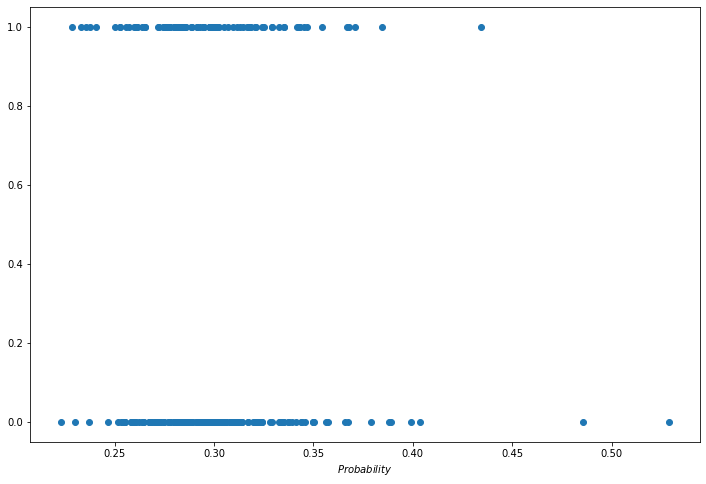

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat,y)
plt.xlabel("$Probability $")
plt.show()

Text(0, 0.5, '$J(\\theta)$')

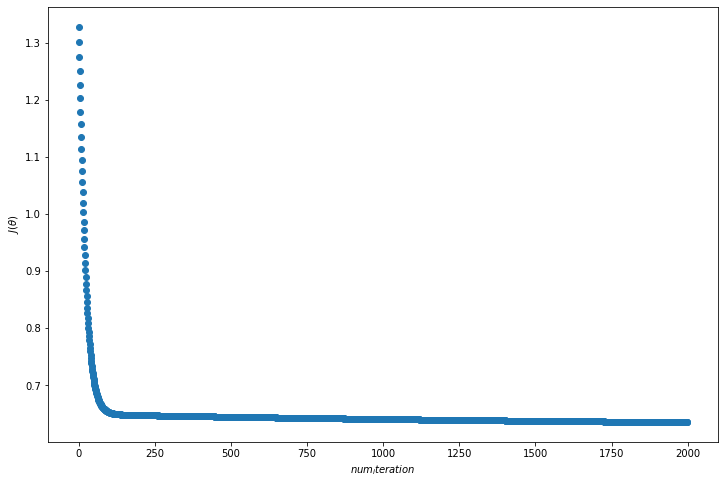

In [24]:
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')

In [25]:
theta0_vals = np.array(lm.hist_param)[:,0]
theta1_vals = np.array(lm.hist_param)[:,1]
J_vals = lm.hist_loss

array([0.28739232, 0.28862555, 0.28983874, ..., 0.18819826, 0.18813677,
       0.18807529])

In [37]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LogisticRegression(alpha= alpha) 
lm.fit_sgd(X, y, iterations=iterations)
yhat = lm.predict_prob(X)

it: 0, train_loss: 207.87931804138447)
it: 200, train_loss: 180.47687121866105)
it: 400, train_loss: 178.0129925819945)
it: 600, train_loss: 193.94856368048937)
it: 800, train_loss: 180.6586229975172)
it: 1000, train_loss: 184.33357166701373)
it: 1200, train_loss: 187.85386460429183)
it: 1400, train_loss: 200.65396217308484)
it: 1600, train_loss: 174.7810352781046)
it: 1800, train_loss: 194.27825891602143)


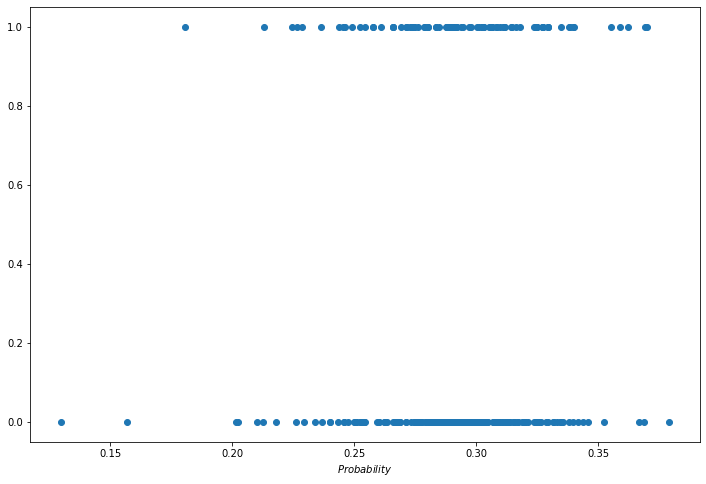

In [38]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat,y)
plt.xlabel("$Probability $")
plt.show()

In [41]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LogisticRegression(alpha= alpha) 
lm.fit_batch_sgd(X, y, iterations=iterations)
yhat = lm.predict_prob(X)

it: 0, train_loss: 5.744044544626618)
it: 100, train_loss: 3.263257438281605)
it: 200, train_loss: 3.7397433392109223)
it: 300, train_loss: 3.8001919266950135)
it: 400, train_loss: 2.5492827480598113)
it: 500, train_loss: 2.652516853996647)
it: 600, train_loss: 3.457727373554877)
it: 700, train_loss: 3.525403682774986)
it: 800, train_loss: 2.0915926181764797)
it: 900, train_loss: 1.984401769717929)
it: 1000, train_loss: 6.397608894509319)
it: 1100, train_loss: 2.6726871431041013)
it: 1200, train_loss: 6.516250378700937)
it: 1300, train_loss: 1.4862491616208904)
it: 1400, train_loss: 1.8263464839606167)
it: 1500, train_loss: 4.012447754035529)
it: 1600, train_loss: 2.386869803929608)
it: 1700, train_loss: 2.5013934415313974)
it: 1800, train_loss: 1.6881906595174176)
it: 1900, train_loss: 4.029341145535157)


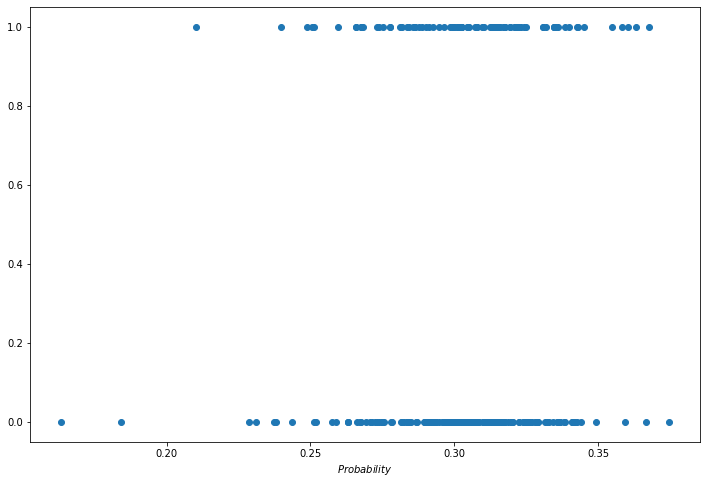

In [42]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat,y)
plt.xlabel("$Probability $")
plt.show()